<a href="https://colab.research.google.com/github/kunalnischal7/ML-Projects/blob/main/MLCLassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

## Importing Libraries

In [1]:
import pandas as pd

## Import Dataset from Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/My Drive/"

/content/drive/My Drive


## Load Data

In [4]:
file_path = 'train.xlsx' #Converted the google sheets file to excel file

### Reading the excel file

In [5]:
df = pd.read_excel(file_path)

# Data Preparation

## Data Shuffling

In [6]:
from sklearn.utils import shuffle #data shuffled to avoid order bias and model is more likely to learn meaningful patterns
df = shuffle(df, random_state = 44)

### Checking null values

In [7]:
df.isnull().sum() #Checking null values in the dataset

T1        0
T2        0
T3        0
T4        0
T5        0
T6        0
T7        0
T8        0
T9        0
T10       0
T11       0
T12       0
T13       0
T14       0
T15       0
T16       0
T17       0
T18       0
target    0
dtype: int64

## Plotting Graphs

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

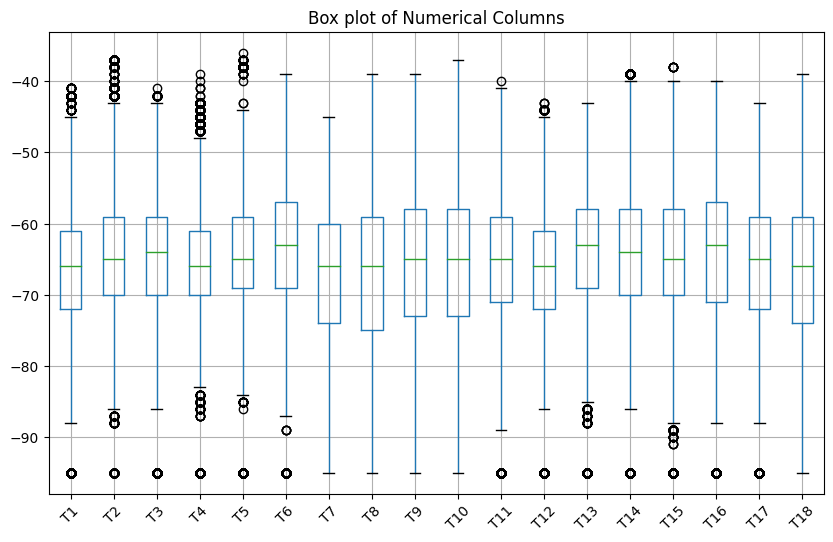

In [9]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title("Box plot of Numerical Columns")
plt.xticks(rotation=45)
plt.show()

## Checking for Outliers

In [10]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

### Using Z-Scores to Identify Outlier

In [11]:
from scipy import stats

z_scores = stats.zscore(df[numerical_cols])

In [12]:
df_z_scores = pd.DataFrame(z_scores, columns=numerical_cols)

In [13]:
threshold = 3

In [14]:
outliers = df_z_scores[(df_z_scores > threshold).any(axis=1)]

In [15]:
num_outliers = outliers.sum()

In [16]:
print("Columns with outliers and number of outliers:")
print(num_outliers[num_outliers > 0])

Columns with outliers and number of outliers:
T1      96.040082
T2     116.886613
T3     139.666204
T4       3.573452
T5     705.305743
T6     228.713384
T7      37.191751
T10    219.188652
T11    184.849486
T12    234.293476
T13    195.811849
T14     46.753109
T15    112.254727
T16     61.633584
dtype: float64


In [17]:
df_cleaned = df.drop(outliers.index)

## Removing the outliers

In [18]:
df_cleaned.to_excel("cleaned_data.xlsx", index=False)

## Using the Interquartile Range Method

In [19]:
threshold = 1.5

In [20]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

In [21]:
Q1_aligned, Q3_aligned = Q1.align(Q3, axis=0)
IQR_aligned = Q3_aligned - Q1_aligned

In [22]:
# Align DataFrames before performing the comparison
df_aligned, Q1_aligned = df.align(Q1, axis=1, copy=False)
df_aligned, Q3_aligned = df_aligned.align(Q3, axis=1, copy=False)
df_aligned, IQR_aligned = df_aligned.align(IQR, axis=1, copy=False)

# Identify outliers
outliers_aligned = (df_aligned < (Q1_aligned - threshold * IQR_aligned)) | (df_aligned > (Q3_aligned + threshold * IQR_aligned))


## Removing Outliers

### Deleting Rows

In [23]:
cleaned_df = df[~outliers_aligned.any(axis=1)]

### Winsorisation

In [24]:
upper_bound = df.quantile(0.95, numeric_only=True) #Numeric_only=True used to remove future warning
lower_bound = df.quantile(0.05, numeric_only=True)
cleaned_df = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

### Trimming

In [25]:
cleaned_df = df[(~outliers_aligned).all(axis=1)]

## Visualisation Techniques

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

### Box Plot

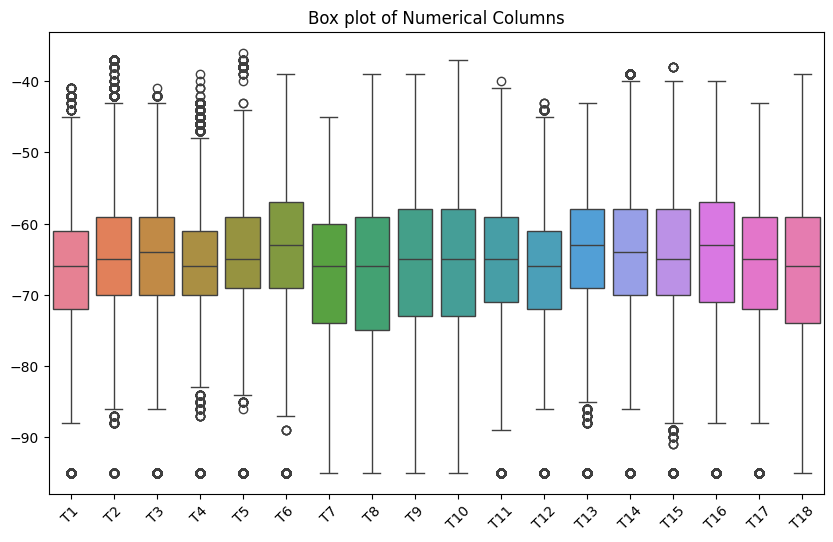

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Box plot of Numerical Columns")
plt.xticks(rotation=45)
plt.show()

# Model Building

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [29]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [30]:
X = df.drop(columns=['target'])
y = df['target']

## Train Test Split

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the model

In [32]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_val_pred = rf_classifier.predict(X_val)

# Evaluation

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [35]:
cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[45  0  0 ...  0  0  0]
 [ 0 44  0 ...  0  0  0]
 [ 0  0 43 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  0  0]
 [ 0  0  0 ...  0 36  0]
 [ 0  0  0 ...  0  0 53]]


In [36]:
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9865324445653653


In [37]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

          A1       0.98      0.92      0.95        49
         A10       0.88      0.98      0.93        45
         A11       1.00      1.00      1.00        43
         A12       1.00      1.00      1.00        39
         A13       1.00      1.00      1.00        42
         A14       1.00      0.99      0.99        89
         A15       0.96      1.00      0.98        70
         A16       1.00      1.00      1.00        56
         A17       0.93      0.98      0.95        42
         A18       1.00      1.00      1.00        43
         A19       1.00      1.00      1.00        40
          A2       1.00      1.00      1.00        38
         A20       1.00      1.00      1.00        46
         A21       0.99      1.00      0.99        72
         A22       1.00      1.00      1.00        43
         A23       1.00      1.00      1.00        43
         A24       1.00      1.00      1.00        33
         A25       0.99    

# SVM Model

## Importing Libraries

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

## Model Building

In [39]:
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

## Predict on Validation Set

In [40]:
y_val_pred = svm_classifier.predict(X_val)

## Evaluate Model Performance

In [41]:
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9824513671609305


## Classification Report

In [42]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

          A1       1.00      0.90      0.95        49
         A10       0.79      1.00      0.88        45
         A11       1.00      1.00      1.00        43
         A12       1.00      1.00      1.00        39
         A13       1.00      1.00      1.00        42
         A14       1.00      1.00      1.00        89
         A15       0.97      0.97      0.97        70
         A16       1.00      1.00      1.00        56
         A17       0.98      0.98      0.98        42
         A18       0.98      1.00      0.99        43
         A19       1.00      0.97      0.99        40
          A2       1.00      1.00      1.00        38
         A20       0.98      1.00      0.99        46
         A21       0.91      0.96      0.93        72
         A22       1.00      1.00      1.00        43
         A23       1.00      1.00      1.00        43
         A24       0.97      1.00      0.99        33
         A25       0.95    